In [127]:
import numpy as np
import matplotlib.pyplot as plt
from NumOpt.OptimizationProblem import OptimizationProblem
from NumOpt.post_processing import plot_histories

PROBLEM PARAMETERS

In [128]:
# parameters
b = 0.125
h = 0.250
Sy = 200E6
Ty = 116E6
P = 100e3
l = 1
args = (b, h, Sy, Ty, P, l)

# design variables
twmin = 2E-3
twmax = 25E-3
tbmin = 2E-3
tbmax = 25E-3

OBJECTIVE FUNCTION CALCULATION

In [129]:
def total_mass(x, *args):
    tb = x[0]
    tw = x[1]
    b, h, Sy, Ty, P, l = args[0]
    mass = 2 * tb * b + h * tw
    return mass

def intertia_moment(x, *args):
    tb = x[0]
    tw = x[1]
    b, h, Sy, Ty, P, l = args[0]
    moment = h**3 / 12 * tw + b /6 * tb**3 + h**2 * b /2 * tb
    return moment

def axial_stress(x, *args):
    tb = x[0]
    tw = x[1]
    b, h, Sy, Ty, P, l = args[0]
    I = intertia_moment(x, *args)
    margin = P * l * h / 2 / I - Sy
    return margin

def shear_stress(x, *args):
    tb = x[0]
    tw = x[1]
    b, h, Sy, Ty, P, l = args[0]
    margin = 1.5 * P / h / tw - Ty
    return margin

def penalized_function(x, *args):
    tb = x[0]
    tw = x[1]
    mu1 = 1e3
    mu2 = 1e3
    obj = (total_mass(x, *args) + mu1*axial_stress(x, *args)**2 + mu2*shear_stress(x, *args)**2)/1e20
    return obj

### Part 1

Solve the problem at various friction coefficient levels

In [130]:
mu1 = 1e-4
mu2 = 0.01
tol = 1e-9
maxiter = 100

initialGuess = [0.5*(tbmin+tbmax), 0.5*(twmin+twmax)]
prob = OptimizationProblem(nDim=2, bounds=[(tbmin, tbmax), (twmin, twmax)])
prob.setObjectiveFunction(penalized_function, args)
history = prob.solve(x0=initialGuess, directionMethod='quasi_newton', 
                        stepMethod='strong_wolfe', options={'maxiter':maxiter, 'tol':tol, 'mu1':mu1, 'mu2':mu2})

Final solution:
        tb =  0.01426039551929059
        tw =  0.005172413793100502


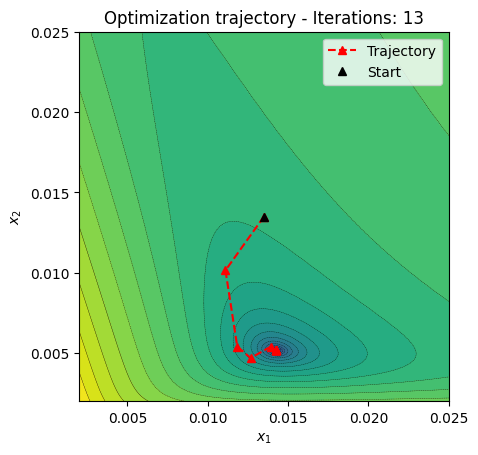

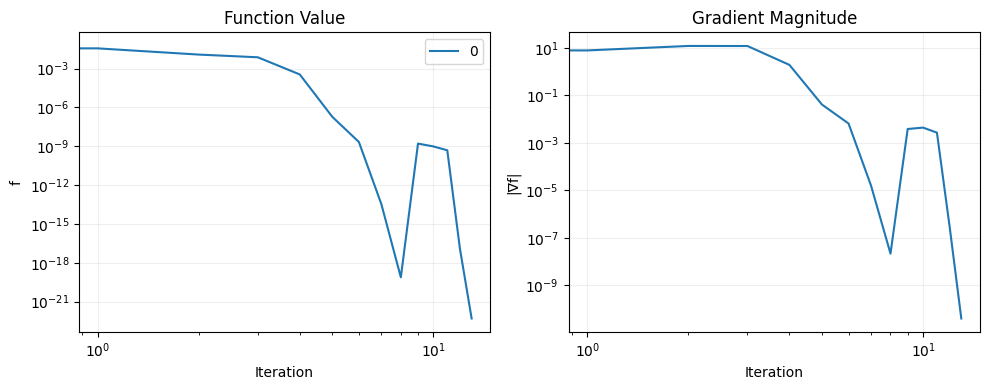

In [131]:
prob.plotSolutionHistory(history, logscale=True)
plot_histories([history], '0.1,0.1', xlog=(True, True), ylog=(True, True))
print('Final solution:')
print('        tb = ', history['x'][-1][0])
print('        tw = ', history['x'][-1][1])